# Real-world Data Wrangling

## 1. Problem Statement

In this project, we will explore two datasets gathered from the U.S. Census Bureau.
- Dataset 1: a subset of 2023 data on full-time earnings for individuals aged 16+ across U.S. county.
- Dataset 2: 2023 data on the number of individuals aged 18 and older with a bachelor's degree, along with the total population aged 18+ across U.S. counties.

Research questions:  
1.	What's the relationship between the percentage of bachelor's degree holders and median earnings across U.S. counties?  
2.	Which income range has the highest percentage in the U.S.?

## 2. Gather data

### 2.1: Dataset 1

Type: CSV file

Gathering method: The data was "downloaded manually" from U.S. Census Bureau (https://data.census.gov/table?q=earnings&g=010XX00US$0500000).

Dataset variables:
There are over 200 variables, but I will keep only 12 of them. In the raw dataset, these variables' names are alphanumeric codes which will be converted to meaningful readable names later in the cleaning steps.
The list of all variables and their meanings can be found here: https://api.census.gov/data/2023/acs/acs1/subject/groups/S2001.html

*   NAME: Geographic Area Name (county and state)
*   S2001_C01_003E: Total population aged 16+ with full-time earnings
*   S2001_C01_004E: Number of people aged 16+ with full-time earnings of \$9,999 or less
*   S2001_C01_005E: Number of people aged 16+ with full-time earnings between \\$10,000 - \$14,999
*   S2001_C01_006E: Number of people aged 16+ with full-time earnings between \\$15,000 - \$24,999
*   S2001_C01_007E: Number of people aged 16+ with full-time earnings between \\$25,000 - \$34,999
*   S2001_C01_008E: Number of people aged 16+ with full-time earnings between \\$35,000 - \$49,999
*   S2001_C01_009E: Number of people aged 16+ with full-time earnings between \\$50,000 - \$64,999
*   S2001_C01_010E: Number of people aged 16+ with full-time earnings between \\$65,000 - \$74,999
*   S2001_C01_011E: Number of people aged 16+ with full-time earnings between \\$75,000 - \$99,999
*   S2001_C01_012E: Number of people aged 16+ with full-time earnings of \\$100,000 or more
*   S2001_C01_013E: Median full-time earning for people aged 16+

In [1]:
# 1st data gathering and loading method
import pandas as pd
raw_earnings = pd.read_csv('ACSST1Y2023.S2001-Data.csv')
raw_earnings.head()

,GEO_ID,NAME,S2001_C01_001E,S2001_C01_001M,S2001_C01_002E,S2001_C01_002M,S2001_C01_003E,S2001_C01_003M,S2001_C01_004E,S2001_C01_004M,...,S2001_C06_016M,S2001_C06_017E,S2001_C06_017M,S2001_C06_018E,S2001_C06_018M,S2001_C06_019E,S2001_C06_019M,S2001_C06_020E,S2001_C06_020M,Unnamed: 242
0,Geography,Geographic Area Name,Estimate!!Total!!Population 16 years and over ...,Margin of Error!!Total!!Population 16 years an...,Estimate!!Total!!Population 16 years and over ...,Margin of Error!!Total!!Population 16 years an...,Estimate!!Total!!Population 16 years and over ...,Margin of Error!!Total!!Population 16 years an...,Estimate!!Total!!Population 16 years and over ...,Margin of Error!!Total!!Population 16 years an...,...,Margin of Error!!Percent Female!!MEDIAN EARNIN...,Estimate!!Percent Female!!MEDIAN EARNINGS BY E...,Margin of Error!!Percent Female!!MEDIAN EARNIN...,Estimate!!Percent Female!!MEDIAN EARNINGS BY E...,Margin of Error!!Percent Female!!MEDIAN EARNIN...,Estimate!!Percent Female!!MEDIAN EARNINGS BY E...,Margin of Error!!Percent Female!!MEDIAN EARNIN...,Estimate!!Percent Female!!MEDIAN EARNINGS BY E...,Margin of Error!!Percent Female!!MEDIAN EARNIN...,NaN
1,0500000US01003,"Baldwin County, Alabama",126591,3755,41702,1591,90456,4487,1332,643,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),NaN
2,0500000US01015,"Calhoun County, Alabama",55173,2846,32742,2636,35776,2412,392,298,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),NaN
3,0500000US01043,"Cullman County, Alabama",45436,1752,37241,3589,30508,2217,784,670,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),NaN
4,0500000US01049,"DeKalb County, Alabama",32230,1909,30883,3100,22690,1737,726,522,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),NaN


### 2.2: Dataset 2

Type: JSON file

Gathering method: The data was gathered using the "API" method from the U.S. Census Bureau (https://data.census.gov/table?q=education&g=010XX00US$0500000).

Dataset variables: In the raw dataset, the variables' names are alphanumeric codes which will be translated and transformed to meaningful names later in the cleaning steps. The list of all variables and their meanings can be found here: https://api.census.gov/data/2023/acs/acs1/subject/groups/S1501.html

*   NAME: County and state
*   S1501_C01_001E: Population aged 18-24
*   S1501_C01_006E: Population aged 25+
*   S1501_C01_005E: Number of people aged 18-24 with a bachelor's degree or higher
*   S1501_C01_015E: Number of people aged 25+ with a bachelor's degree or higher

The ucgid (geographic code) column is unnecessary and will be removed later.

In [2]:
# 2nd data gathering and loading method
import requests
import json
response = requests.get('https://api.census.gov/data/2023/acs/acs1/subject?get=NAME,S1501_C01_001E,S1501_C01_006E,S1501_C01_005E,S1501_C01_015E&ucgid=pseudo(0100000US$0500000)')
content = response.json()

In [3]:
# Store the raw data in local data store
with open('raw_education.json', 'w') as file:
    json.dump(content, file)

raw_edu = pd.read_json('raw_education.json')
raw_edu.head()

,0,1,2,3,4,5
0,NAME,S1501_C01_001E,S1501_C01_006E,S1501_C01_005E,S1501_C01_015E,ucgid
1,"Baldwin County, Alabama",15552,184852,2213,59243,0500000US01003
2,"Calhoun County, Alabama",13499,78420,605,18557,0500000US01015
3,"Cullman County, Alabama",7223,64307,661,11065,0500000US01043
4,"DeKalb County, Alabama",6538,48611,594,6542,0500000US01049


## 3. Data Wrangling

### 3.1: Dataset 1

In [4]:
# Make a copy of the dataset to ensure the raw dataframe is not impacted
cleaned_earnings = raw_earnings.copy()

#### Tidiness Issue 1: Unnecessary Variables

In [5]:
# Inspecting the dataframe visually
cleaned_earnings.head(2)

,GEO_ID,NAME,S2001_C01_001E,S2001_C01_001M,S2001_C01_002E,S2001_C01_002M,S2001_C01_003E,S2001_C01_003M,S2001_C01_004E,S2001_C01_004M,...,S2001_C06_016M,S2001_C06_017E,S2001_C06_017M,S2001_C06_018E,S2001_C06_018M,S2001_C06_019E,S2001_C06_019M,S2001_C06_020E,S2001_C06_020M,Unnamed: 242
0,Geography,Geographic Area Name,Estimate!!Total!!Population 16 years and over ...,Margin of Error!!Total!!Population 16 years an...,Estimate!!Total!!Population 16 years and over ...,Margin of Error!!Total!!Population 16 years an...,Estimate!!Total!!Population 16 years and over ...,Margin of Error!!Total!!Population 16 years an...,Estimate!!Total!!Population 16 years and over ...,Margin of Error!!Total!!Population 16 years an...,...,Margin of Error!!Percent Female!!MEDIAN EARNIN...,Estimate!!Percent Female!!MEDIAN EARNINGS BY E...,Margin of Error!!Percent Female!!MEDIAN EARNIN...,Estimate!!Percent Female!!MEDIAN EARNINGS BY E...,Margin of Error!!Percent Female!!MEDIAN EARNIN...,Estimate!!Percent Female!!MEDIAN EARNINGS BY E...,Margin of Error!!Percent Female!!MEDIAN EARNIN...,Estimate!!Percent Female!!MEDIAN EARNINGS BY E...,Margin of Error!!Percent Female!!MEDIAN EARNIN...,NaN
1,0500000US01003,"Baldwin County, Alabama",126591,3755,41702,1591,90456,4487,1332,643,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),NaN


In [6]:
# Inspecting the dataframe programmatically
cleaned_earnings.columns

Index(['GEO_ID', 'NAME', 'S2001_C01_001E', 'S2001_C01_001M', 'S2001_C01_002E',
       'S2001_C01_002M', 'S2001_C01_003E', 'S2001_C01_003M', 'S2001_C01_004E',
       'S2001_C01_004M',
       ...
       'S2001_C06_016M', 'S2001_C06_017E', 'S2001_C06_017M', 'S2001_C06_018E',
       'S2001_C06_018M', 'S2001_C06_019E', 'S2001_C06_019M', 'S2001_C06_020E',
       'S2001_C06_020M', 'Unnamed: 242'],
      dtype='object', length=243)

**Issue and justification:** In the raw_earnings dataframe, there are 243 variables. I will need to narrow the dataframe down to only important columns.  

**Address the issue:**  I want to keep only the 12 columns that I need for later analysis.

In [7]:
# Apply the cleaning strategy
# Select and keep important columns
important_columns = ['NAME', 'S2001_C01_003E', 'S2001_C01_004E', 'S2001_C01_005E', 'S2001_C01_006E', 'S2001_C01_007E',
                     'S2001_C01_008E', 'S2001_C01_009E', 'S2001_C01_010E', 'S2001_C01_011E', 'S2001_C01_012E', 'S2001_C01_013E']
cleaned_earnings = cleaned_earnings[important_columns]
cleaned_earnings.shape

(855, 12)

#### Tidiness Issue 2: Column Headers Are Codes

In [8]:
# Inspecting the dataframe visually
cleaned_earnings.head(1)

,NAME,S2001_C01_003E,S2001_C01_004E,S2001_C01_005E,S2001_C01_006E,S2001_C01_007E,S2001_C01_008E,S2001_C01_009E,S2001_C01_010E,S2001_C01_011E,S2001_C01_012E,S2001_C01_013E
0,Geographic Area Name,Estimate!!Total!!Population 16 years and over ...,Estimate!!Total!!Population 16 years and over ...,Estimate!!Total!!Population 16 years and over ...,Estimate!!Total!!Population 16 years and over ...,Estimate!!Total!!Population 16 years and over ...,Estimate!!Total!!Population 16 years and over ...,Estimate!!Total!!Population 16 years and over ...,Estimate!!Total!!Population 16 years and over ...,Estimate!!Total!!Population 16 years and over ...,Estimate!!Total!!Population 16 years and over ...,Estimate!!Total!!Population 16 years and over ...


In [9]:
# Inspecting the dataframe programmatically
# List the column headers
cleaned_earnings.columns

Index(['NAME', 'S2001_C01_003E', 'S2001_C01_004E', 'S2001_C01_005E',
       'S2001_C01_006E', 'S2001_C01_007E', 'S2001_C01_008E', 'S2001_C01_009E',
       'S2001_C01_010E', 'S2001_C01_011E', 'S2001_C01_012E', 'S2001_C01_013E'],
      dtype='object')

**Issue and justification:** Column headers are alphanumeric codes that are hard to understand. These headers should be converted into short descriptive names.

**Address the issue:** Convert column headers into readable column names.

The first row contains column labels that describe the columns. We can take a look at these column labels to understand each column.

In [10]:
# Access the column labels in the first row
cleaned_earnings.iloc[0]

NAME                                           Geographic Area Name
S2001_C01_003E    Estimate!!Total!!Population 16 years and over ...
S2001_C01_004E    Estimate!!Total!!Population 16 years and over ...
S2001_C01_005E    Estimate!!Total!!Population 16 years and over ...
S2001_C01_006E    Estimate!!Total!!Population 16 years and over ...
S2001_C01_007E    Estimate!!Total!!Population 16 years and over ...
S2001_C01_008E    Estimate!!Total!!Population 16 years and over ...
S2001_C01_009E    Estimate!!Total!!Population 16 years and over ...
S2001_C01_010E    Estimate!!Total!!Population 16 years and over ...
S2001_C01_011E    Estimate!!Total!!Population 16 years and over ...
S2001_C01_012E    Estimate!!Total!!Population 16 years and over ...
S2001_C01_013E    Estimate!!Total!!Population 16 years and over ...
Name: 0, dtype: object

The variables' labels are too long, so let me shorten these labels to make it easier to understand these variables.

In [11]:
# Shorten the lengthy column labels by removing repetitive phrases
cleaned_earnings.iloc[0, 0:12].str.replace('Estimate!!Total!!Population 16 years and over with earnings!!FULL-TIME, YEAR-ROUND WORKERS','')

NAME                                           Geographic Area Name
S2001_C01_003E                                        WITH EARNINGS
S2001_C01_004E                  WITH EARNINGS!!$1 to $9,999 or loss
S2001_C01_005E                    WITH EARNINGS!!$10,000 to $14,999
S2001_C01_006E                    WITH EARNINGS!!$15,000 to $24,999
S2001_C01_007E                    WITH EARNINGS!!$25,000 to $34,999
S2001_C01_008E                    WITH EARNINGS!!$35,000 to $49,999
S2001_C01_009E                    WITH EARNINGS!!$50,000 to $64,999
S2001_C01_010E                    WITH EARNINGS!!$65,000 to $74,999
S2001_C01_011E                    WITH EARNINGS!!$75,000 to $99,999
S2001_C01_012E                      WITH EARNINGS!!$100,000 or more
S2001_C01_013E     WITH EARNINGS!!Median earnings (dollars) for ...
Name: 0, dtype: object

Based on the above view of the column labels, here's a summary of columns' descriptions:
1. NAME: Geographic Area Name (county and state)  
2. S2001_C01_003E: Total population aged 16+ with full-time earnings
3. S2001_C01_004E: Number of people aged 16+ with full-time earnings of \$9,999 or less
4. S2001_C01_005E: Number of people aged 16+ with full-time earnings between \\$10,000 - \$14,999
5. S2001_C01_006E: Number of people aged 16+ with full-time earnings between \\$15,000 - \$24,999
6. S2001_C01_007E: Number of people aged 16+ with full-time earnings between \\$25,000 - \$34,999
7. S2001_C01_008E: Number of people aged 16+ with full-time earnings between \\$35,000 - \$49,999
8. S2001_C01_009E: Number of people aged 16+ with full-time earnings between \\$50,000 - \$64,999
9. S2001_C01_010E: Number of people aged 16+ with full-time earnings between \\$65,000 - \$74,999
10. S2001_C01_011E: Number of people aged 16+ with full-time earnings between \\$75,000 - \$99,999
11. S2001_C01_012E: Number of people aged 16+ with full-time earnings of \\$100,000 or more
12. S2001_C01_013E: Median full-time earning for people aged 16+

In [12]:
# Apply the cleaning strategy
# Rename columns
earnings_headers = {'NAME': 'Area',
                    'S2001_C01_003E': 'Population_16+',
                    'S2001_C01_004E': '9,999 or less',
                    'S2001_C01_005E': '10,000 - 14,999',
                    'S2001_C01_006E': '15,000 - 24,999',
                    'S2001_C01_007E': '25,000 - 34,999',
                    'S2001_C01_008E': '35,000 - 49,999',
                    'S2001_C01_009E': '50,000 - 64,999',
                    'S2001_C01_010E': '65,000 - 74,999',
                    'S2001_C01_011E': '75,000 - 99,999',
                    'S2001_C01_012E': '100,000 or more',
                    'S2001_C01_013E': 'Median earning'}
cleaned_earnings.rename(columns=earnings_headers, inplace=True)

In [13]:
# Validate the cleaning was successful
cleaned_earnings.columns

Index(['Area', 'Population_16+', '9,999 or less', '10,000 - 14,999',
       '15,000 - 24,999', '25,000 - 34,999', '35,000 - 49,999',
       '50,000 - 64,999', '65,000 - 74,999', '75,000 - 99,999',
       '100,000 or more', 'Median earning'],
      dtype='object')

#### Tidiness Issue 3: Column Headers are Values, Not Variables

In [14]:
# Inspecting the dataframe visually
cleaned_earnings.head(2)

,Area,Population_16+,"9,999 or less","10,000 - 14,999","15,000 - 24,999","25,000 - 34,999","35,000 - 49,999","50,000 - 64,999","65,000 - 74,999","75,000 - 99,999","100,000 or more",Median earning
0,Geographic Area Name,Estimate!!Total!!Population 16 years and over ...,Estimate!!Total!!Population 16 years and over ...,Estimate!!Total!!Population 16 years and over ...,Estimate!!Total!!Population 16 years and over ...,Estimate!!Total!!Population 16 years and over ...,Estimate!!Total!!Population 16 years and over ...,Estimate!!Total!!Population 16 years and over ...,Estimate!!Total!!Population 16 years and over ...,Estimate!!Total!!Population 16 years and over ...,Estimate!!Total!!Population 16 years and over ...,Estimate!!Total!!Population 16 years and over ...
1,"Baldwin County, Alabama",90456,1332,1678,7098,10878,18667,14898,6832,11556,17517,56339


**Issue and justification:** For a dataset to be tidy, its columns should be variables, not values. There are 9 consecutive columns (from the 3rd to the 11th column) that are different earning ranges. These ranges are values of one single variable which can be named "Earning range."

**Address the issue:** The columns that represent different earning ranges become values of "Earning range" column and the original values under these columns form a new column named "Count". The new structure will have distinct variables representing distinct features of the dataset.  
After unpivoting, there should be 9 unique values (9 earning ranges) under the "Earning range" column. The total entries should equal 7686 (854 entries/value x 9 values).

In [15]:
# Apply the cleaning strategy
# Unpivot the cleaned_earnings dataframe
cleaned_earnings = pd.melt(cleaned_earnings, id_vars=['Area', 'Median earning', 'Population_16+'], 
                           var_name='Earning range', value_name='Count')

In [16]:
# Visually validate the cleaning was successful
cleaned_earnings.head(20)

,Area,Median earning,Population_16+,Earning range,Count
0,Geographic Area Name,Estimate!!Total!!Population 16 years and over ...,Estimate!!Total!!Population 16 years and over ...,"9,999 or less",Estimate!!Total!!Population 16 years and over ...
1,"Baldwin County, Alabama",56339,90456,"9,999 or less",1332
2,"Calhoun County, Alabama",45999,35776,"9,999 or less",392
3,"Cullman County, Alabama",50270,30508,"9,999 or less",784
4,"DeKalb County, Alabama",40200,22690,"9,999 or less",726
5,"Elmore County, Alabama",53486,N,"9,999 or less",N
6,"Etowah County, Alabama",47183,32505,"9,999 or less",1655
7,"Houston County, Alabama",44299,38094,"9,999 or less",1008
8,"Jefferson County, Alabama",52154,240596,"9,999 or less",2917
9,"Lauderdale County, Alabama",50352,31290,"9,999 or less",1222


In [17]:
# Validate the cleaning was successful
# Check the number of unique values under "Earning range" column
cleaned_earnings['Earning range'].describe()

count              7695
unique                9
top       9,999 or less
freq                855
Name: Earning range, dtype: object

In [18]:
# Validate the cleaning was successful
# Check if each value in 'Earning range' has the same number of entries
cleaned_earnings['Earning range'].value_counts()

Earning range
9,999 or less      855
10,000 - 14,999    855
15,000 - 24,999    855
25,000 - 34,999    855
35,000 - 49,999    855
50,000 - 64,999    855
65,000 - 74,999    855
75,000 - 99,999    855
100,000 or more    855
Name: count, dtype: int64

#### Quality Issue 1: Inconsistency

In [19]:
# Inspecting the dataframe visually
cleaned_earnings.head()

,Area,Median earning,Population_16+,Earning range,Count
0,Geographic Area Name,Estimate!!Total!!Population 16 years and over ...,Estimate!!Total!!Population 16 years and over ...,"9,999 or less",Estimate!!Total!!Population 16 years and over ...
1,"Baldwin County, Alabama",56339,90456,"9,999 or less",1332
2,"Calhoun County, Alabama",45999,35776,"9,999 or less",392
3,"Cullman County, Alabama",50270,30508,"9,999 or less",784
4,"DeKalb County, Alabama",40200,22690,"9,999 or less",726


In [20]:
# Inspecting the dataframe programmatically 
# Check if there is any long value in columns that are expected to contain numbers with under 10 characters in length
for col in range(1,5):
    if col == 3:  # Skip 'Earning range' column
        continue
    # Create a boolean Series that indicates whether each value in the column exceeds 10 characters
    long_vals = cleaned_earnings.iloc[:, col].apply(len) > 10
    # Check the location of long values
    print(cleaned_earnings.iloc[:,col][long_vals])

0       Estimate!!Total!!Population 16 years and over ...
855     Estimate!!Total!!Population 16 years and over ...
1710    Estimate!!Total!!Population 16 years and over ...
2565    Estimate!!Total!!Population 16 years and over ...
3420    Estimate!!Total!!Population 16 years and over ...
4275    Estimate!!Total!!Population 16 years and over ...
5130    Estimate!!Total!!Population 16 years and over ...
5985    Estimate!!Total!!Population 16 years and over ...
6840    Estimate!!Total!!Population 16 years and over ...
Name: Median earning, dtype: object
0       Estimate!!Total!!Population 16 years and over ...
855     Estimate!!Total!!Population 16 years and over ...
1710    Estimate!!Total!!Population 16 years and over ...
2565    Estimate!!Total!!Population 16 years and over ...
3420    Estimate!!Total!!Population 16 years and over ...
4275    Estimate!!Total!!Population 16 years and over ...
5130    Estimate!!Total!!Population 16 years and over ...
5985    Estimate!!Total!!Population 

**Issue and justification:** The first row should contain actual observations. The fact that the first row contains column labels or descriptions rather than actual data causes inconsistency with the dataset because the dataset's format is not aligned with typical expectations.

**Address the issue:** Since the first row contains column labels and not valid observation, it should be removed. The first observation in the dataset should be Baldwin County, Alabama.

In [21]:
# Apply the cleaning strategy
# Remove the first row and reset the row index
cleaned_earnings.drop(0, inplace=True)
cleaned_earnings = cleaned_earnings.reset_index(drop=True)

In [22]:
# Validate the cleaning was successful
cleaned_earnings.head(2)

,Area,Median earning,Population_16+,Earning range,Count
0,"Baldwin County, Alabama",56339,90456,"9,999 or less",1332
1,"Calhoun County, Alabama",45999,35776,"9,999 or less",392


#### Quality Issue 2: Completeness Issues

In [23]:
# Inspecting the dataframe visually
cleaned_earnings.sample(10, random_state=15)

,Area,Median earning,Population_16+,Earning range,Count
191,"Hawaii County, Hawaii",52085,58672,"9,999 or less",1191
4511,"Kosciusko County, Indiana",51757,29265,"50,000 - 64,999",6708
1052,"Bonneville County, Idaho",53538,42831,"10,000 - 14,999",1063
2705,"Pasco County, Florida",55057,215662,"25,000 - 34,999",27776
5592,"Clinton County, New York",53843,26759,"65,000 - 74,999",2875
1417,"Marion County, Ohio",50261,N,"10,000 - 14,999",N
6111,"Indian River County, Florida",52115,47508,"75,000 - 99,999",3984
2837,"Daviess County, Kentucky",46224,37117,"25,000 - 34,999",4546
756,"Washington County, Utah",53875,54853,"9,999 or less",601
3509,"Broomfield County, Colorado",75683,32082,"35,000 - 49,999",3498


In [24]:
# Inspecting the dataframe programmatically
# Check the number of missing values in each column
cleaned_earnings.isnull().sum()

Area              0
Median earning    0
Population_16+    0
Earning range     0
Count             0
dtype: int64

In [25]:
# Check for the most common value in each column
cleaned_earnings.describe()

,Area,Median earning,Population_16+,Earning range,Count
count,7694,7694,7694,7694,7694
unique,855,847,788,9,5948
top,"Trujillo Alto Municipio, Puerto Rico",56339,N,"10,000 - 14,999",N
freq,9,18,594,855,594


**Issue and justification:** Although the output .isnull() shows that there is no missing value, when inspecting visually, I discovered that some null values are represented as "N". Additionally, the "top" output from .describe() function also shows that the most frequent value for some columns is "N" and it appears 594 times in all columns that have it.

**Address the issue:** Replace 'N' values with pd.NA.

In [26]:
# Apply the cleaning strategy
# Replace 'N' with NA
cleaned_earnings.replace('N', pd.NA, inplace=True)

In [27]:
# Validate the cleaning was successful
cleaned_earnings.describe()

,Area,Median earning,Population_16+,Earning range,Count
count,7694,7694,7100,7694,7100
unique,855,847,787,9,5947
top,"Trujillo Alto Municipio, Puerto Rico",56339,27342,"10,000 - 14,999",383
freq,9,18,18,855,5


In [28]:
# Check the number of NA values in each column
cleaned_earnings.isna().sum()

Area                0
Median earning      0
Population_16+    594
Earning range       0
Count             594
dtype: int64

In [29]:
# Visually check the NA values
cleaned_earnings.head()

,Area,Median earning,Population_16+,Earning range,Count
0,"Baldwin County, Alabama",56339,90456,"9,999 or less",1332
1,"Calhoun County, Alabama",45999,35776,"9,999 or less",392
2,"Cullman County, Alabama",50270,30508,"9,999 or less",784
3,"DeKalb County, Alabama",40200,22690,"9,999 or less",726
4,"Elmore County, Alabama",53486,<NA>,"9,999 or less",<NA>


In [30]:
na_rows = cleaned_earnings[cleaned_earnings.isnull().any(axis=1)]
na_rows.describe()

,Area,Median earning,Population_16+,Earning range,Count
count,594,594,0,594,0
unique,66,66,0,9,0
top,"Elmore County, Alabama",53486,NaN,"9,999 or less",NaN
freq,9,9,NaN,66,NaN


There're 594 rows with at least 1 missing values. Each row has 2 missing values on these columns: 'Population_16+' and 'Count'. 
For each county in 'Area', there should be 9 corresponding 'Earning range' values. It looks like for value 'Elmore County, Alabama', all of the 9 'Earning range' counts are missing. Therefore, I suspect that there are 66 distinct counties, each has 9 missing earning range counts and 1 missing value for 'Populations_16+'.  
The calculation adds up: 66 counties x 9 missing earning range counts = 594 rows with missing values

In [31]:
cleaned_earnings[cleaned_earnings['Area'] == 'Elmore County, Alabama']

,Area,Median earning,Population_16+,Earning range,Count
4,"Elmore County, Alabama",53486,<NA>,"9,999 or less",<NA>
859,"Elmore County, Alabama",53486,<NA>,"10,000 - 14,999",<NA>
1714,"Elmore County, Alabama",53486,<NA>,"15,000 - 24,999",<NA>
2569,"Elmore County, Alabama",53486,<NA>,"25,000 - 34,999",<NA>
3424,"Elmore County, Alabama",53486,<NA>,"35,000 - 49,999",<NA>
4279,"Elmore County, Alabama",53486,<NA>,"50,000 - 64,999",<NA>
5134,"Elmore County, Alabama",53486,<NA>,"65,000 - 74,999",<NA>
5989,"Elmore County, Alabama",53486,<NA>,"75,000 - 99,999",<NA>
6844,"Elmore County, Alabama",53486,<NA>,"100,000 or more",<NA>


In [32]:
# Inspect whether each county has 9 pairs of missing values
na_rows['Area'].value_counts()

Area
Elmore County, Alabama                  9
Talladega County, Alabama               9
Apache County, Arizona                  9
Jefferson County, Arkansas              9
Lonoke County, Arkansas                 9
                                       ..
Raleigh County, West Virginia           9
Arecibo Municipio, Puerto Rico          9
Mayagüez Municipio, Puerto Rico         9
Toa Alta Municipio, Puerto Rico         9
Trujillo Alto Municipio, Puerto Rico    9
Name: count, Length: 66, dtype: int64

I've decided to keep these NA values instead of deleting rows/columns to avoid loosing other data. There is also not enough data to impute these missing values.

#### Quality Issue 3: Validity Issues - Incorrect Data Types

In [33]:
# Inspecting the dataframe visually
cleaned_earnings.head()

,Area,Median earning,Population_16+,Earning range,Count
0,"Baldwin County, Alabama",56339,90456,"9,999 or less",1332
1,"Calhoun County, Alabama",45999,35776,"9,999 or less",392
2,"Cullman County, Alabama",50270,30508,"9,999 or less",784
3,"DeKalb County, Alabama",40200,22690,"9,999 or less",726
4,"Elmore County, Alabama",53486,<NA>,"9,999 or less",<NA>


In [34]:
# Inspecting the dataframe programmatically
cleaned_earnings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7694 entries, 0 to 7693
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Area            7694 non-null   object
 1   Median earning  7694 non-null   object
 2   Population_16+  7100 non-null   object
 3   Earning range   7694 non-null   object
 4   Count           7100 non-null   object
dtypes: object(5)
memory usage: 300.7+ KB


**Issue and justification:** All the columns have object data type. However, except for the 'Area' and 'Earning range' columns, the rest should have integer data type.

**Address the issue:** Convert 'Median earning', 'Population_16+', 'Count' columns to numeric type.

The pd.to_numeric function can handle NA values (non-numeric values) and change data type to float. The .astype() method is used to convert float to Int64.

In [35]:
# Apply the cleaning strategy
# Identify columns that should be integer
earnings_int_cols = cleaned_earnings.columns[[1,2,4]]
# Apply data type change to these columns
for col in earnings_int_cols:
    cleaned_earnings[col] = pd.to_numeric(cleaned_earnings[col], errors='coerce')
    cleaned_earnings[col] = cleaned_earnings[col].astype('Int64')

In [36]:
# Validate the cleaning was successful
cleaned_earnings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7694 entries, 0 to 7693
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Area            7694 non-null   object
 1   Median earning  7686 non-null   Int64 
 2   Population_16+  7092 non-null   Int64 
 3   Earning range   7694 non-null   object
 4   Count           7092 non-null   Int64 
dtypes: Int64(3), object(2)
memory usage: 323.2+ KB


In [37]:
cleaned_earnings.head()

,Area,Median earning,Population_16+,Earning range,Count
0,"Baldwin County, Alabama",56339,90456,"9,999 or less",1332
1,"Calhoun County, Alabama",45999,35776,"9,999 or less",392
2,"Cullman County, Alabama",50270,30508,"9,999 or less",784
3,"DeKalb County, Alabama",40200,22690,"9,999 or less",726
4,"Elmore County, Alabama",53486,<NA>,"9,999 or less",<NA>


### 3.2: Dataset 2

In [38]:
# Make a copy of the dataset to ensure the raw dataframe is not impacted
cleaned_edu = raw_edu.copy()

#### Tidiness Issue 1: Unnecessary Variables

In [39]:
# Inspecting the dataframe visually
cleaned_edu.head(2)

,0,1,2,3,4,5
0,NAME,S1501_C01_001E,S1501_C01_006E,S1501_C01_005E,S1501_C01_015E,ucgid
1,"Baldwin County, Alabama",15552,184852,2213,59243,0500000US01003


In [40]:
# Inspecting the dataframe programmatically
# Check the last column
cleaned_edu[5]

0               ucgid
1      0500000US01003
2      0500000US01015
3      0500000US01043
4      0500000US01049
            ...      
850    0500000US72113
851    0500000US72127
852    0500000US72135
853    0500000US72137
854    0500000US72139
Name: 5, Length: 855, dtype: object

**Issue and justification:** In the raw_edu dataframe, the last column contains geographic id for each county in the US which is unnecessary for analysis and should be removed later.

**Address the issue:** I will drop the last column because it is unnecessary. The number of columns after dropping will be 5.

In [41]:
# Apply the cleaning strategy
# Drop the last column
cleaned_edu.drop(columns=[5], inplace=True)

In [42]:
# Validate the cleaning was successful
cleaned_edu.shape

(855, 5)

In [43]:
# Visually validate the cleaning was successful
cleaned_edu.head(2)

,0,1,2,3,4
0,NAME,S1501_C01_001E,S1501_C01_006E,S1501_C01_005E,S1501_C01_015E
1,"Baldwin County, Alabama",15552,184852,2213,59243


#### Tidiness Issue 2: Column Headers Are Not Available

In [44]:
# Inspecting the dataframe visually
cleaned_edu.head(1)

,0,1,2,3,4
0,NAME,S1501_C01_001E,S1501_C01_006E,S1501_C01_005E,S1501_C01_015E


In [45]:
# Inspecting the dataframe programmatically
# List the column headers
cleaned_edu.columns

RangeIndex(start=0, stop=5, step=1)

**Issue and justification:** Every column must be a variable. However, as shown above, the column headers in the raw_edu dataframe are column indices instead, and the actual column headers are in the first row.

**Address the issue:** The first row is set as column header. However, values in the first row still remain and will be deleted later in cleaning steps for Quality Issue 1.

In [46]:
# Apply the cleaning strategy
# Set the first row as header
cleaned_edu.columns = cleaned_edu.iloc[0]

In [47]:
# Visually validate the cleaning was successful
cleaned_edu.head(3)

,NAME,S1501_C01_001E,S1501_C01_006E,S1501_C01_005E,S1501_C01_015E
0,NAME,S1501_C01_001E,S1501_C01_006E,S1501_C01_005E,S1501_C01_015E
1,"Baldwin County, Alabama",15552,184852,2213,59243
2,"Calhoun County, Alabama",13499,78420,605,18557


#### Tidiness Issue 3: Column Headers Are Codes

In [48]:
# Inspecting the dataframe visually
cleaned_edu.head(1)

,NAME,S1501_C01_001E,S1501_C01_006E,S1501_C01_005E,S1501_C01_015E
0,NAME,S1501_C01_001E,S1501_C01_006E,S1501_C01_005E,S1501_C01_015E


In [49]:
# Inspecting the dataframe programmatically
cleaned_edu.columns

Index(['NAME', 'S1501_C01_001E', 'S1501_C01_006E', 'S1501_C01_005E',
       'S1501_C01_015E'],
      dtype='object', name=0)

Unlike dataset 1, there is no column label in dataset 2, but we still can access the column metadata through API requests.

In [50]:
# Check the column labels for the important columns
# Column metadata in JSON format can be accessed through API requests
url_col0 = 'https://api.census.gov/data/2023/acs/acs1/subject/variables/NAME.json'
url_col1 = 'https://api.census.gov/data/2023/acs/acs1/subject/variables/S1501_C01_001E.json'
url_col2 = 'https://api.census.gov/data/2023/acs/acs1/subject/variables/S1501_C01_006E.json'
url_col3 = 'https://api.census.gov/data/2023/acs/acs1/subject/variables/S1501_C01_005E.json'
url_col4 = 'https://api.census.gov/data/2023/acs/acs1/subject/variables/S1501_C01_015E.json'
label_col0 = requests.get(url_col0).json()
label_col1 = requests.get(url_col1).json()
label_col2 = requests.get(url_col2).json()
label_col3 = requests.get(url_col3).json()
label_col4 = requests.get(url_col4).json()
print(label_col0['name'],':',label_col0['label'])
print(label_col1['name'],':',label_col1['label'])
print(label_col2['name'],':',label_col2['label'])
print(label_col3['name'],':',label_col3['label'])
print(label_col4['name'],':',label_col4['label'])

NAME : Geographic Area Name
S1501_C01_001E : Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years
S1501_C01_006E : Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over
S1501_C01_005E : Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Bachelor's degree or higher
S1501_C01_015E : Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher


A summary of columns' labels:

NAME: Geographic Area Name (county and state)  
S1501_C01_001E: Total population aged 18-24  
S1501_C01_006E: Total population aged 25+  
S1501_C01_005E: Number of bachelor's degree holders aged 18-24  
S1501_C01_015E: Number of bachelor's degree holders aged 25+

**Issue and justification:** Column headers are alphanumeric codes that are hard to understand. These headers should be converted into short descriptive names.

**Address the issue:** Convert column headers into readable column names.

In [51]:
# Apply the cleaning strategy
edu_headers = {'NAME': 'Area', 'S1501_C01_001E': 'Population_18-24', 'S1501_C01_006E': 'Population_25+',
               'S1501_C01_005E': 'BA/BS_18-24', 'S1501_C01_015E': 'BA/BS_25+'}
cleaned_edu.rename(columns=edu_headers, inplace=True)

In [52]:
# Validate the cleaning was successful
cleaned_edu.columns

Index(['Area', 'Population_18-24', 'Population_25+', 'BA/BS_18-24',
       'BA/BS_25+'],
      dtype='object', name=0)

In [53]:
# Visually validate the cleaning was successful
cleaned_edu.head(3)

,Area,Population_18-24,Population_25+,BA/BS_18-24,BA/BS_25+
0,NAME,S1501_C01_001E,S1501_C01_006E,S1501_C01_005E,S1501_C01_015E
1,"Baldwin County, Alabama",15552,184852,2213,59243
2,"Calhoun County, Alabama",13499,78420,605,18557


#### Quality Issue 1: Inconsistency

In [54]:
# Inspecting the dataframe visually
cleaned_edu.head()

,Area,Population_18-24,Population_25+,BA/BS_18-24,BA/BS_25+
0,NAME,S1501_C01_001E,S1501_C01_006E,S1501_C01_005E,S1501_C01_015E
1,"Baldwin County, Alabama",15552,184852,2213,59243
2,"Calhoun County, Alabama",13499,78420,605,18557
3,"Cullman County, Alabama",7223,64307,661,11065
4,"DeKalb County, Alabama",6538,48611,594,6542


In [55]:
# Inspecting the dataframe programmatically
# Check if there is any long value in columns that are expected to contain numbers with under 10 digits
for col in range(1,5):
    long_vals = cleaned_edu.iloc[:, col].apply(len) > 10
    # Check the location of long values
    print(cleaned_edu.iloc[:,col][long_vals])

0    S1501_C01_001E
Name: Population_18-24, dtype: object
0    S1501_C01_006E
Name: Population_25+, dtype: object
0    S1501_C01_005E
Name: BA/BS_18-24, dtype: object
0    S1501_C01_015E
Name: BA/BS_25+, dtype: object


**Issue and justification:** The first row in this dataset also does not contain the actual observations as expected.

**Justification:** Since the first row contains column names and not valid observation, it should be removed. The first observation in the dataset should be Baldwin County, Alabama.

In [56]:
# Apply the cleaning strategy
# Remove the first row and reset the row index
cleaned_edu.drop(0, inplace=True)
cleaned_edu = cleaned_edu.reset_index(drop=True)

In [57]:
# Validate the cleaning was successful
cleaned_edu.head(3)

,Area,Population_18-24,Population_25+,BA/BS_18-24,BA/BS_25+
0,"Baldwin County, Alabama",15552,184852,2213,59243
1,"Calhoun County, Alabama",13499,78420,605,18557
2,"Cullman County, Alabama",7223,64307,661,11065


#### Quality Issue 2: Completeness Issues

In [58]:
# Inspecting the dataframe visually
cleaned_edu.sample(10, random_state=5)

,Area,Population_18-24,Population_25+,BA/BS_18-24,BA/BS_25+
468,"Monroe County, New York",72419,525326,11997,217881
250,"Black Hawk County, Iowa",18173,84166,3074,24440
537,"Burleigh County, North Dakota",8947,68141,1575,27170
11,"Madison County, Alabama",39939,284230,8256,135640
488,"Tompkins County, New York",28833,60770,6176,36856
346,"Lapeer County, Michigan",5938,65063,268,12835
844,"Bayamón Municipio, Puerto Rico",16064,137753,1916,48083
509,"Gaston County, North Carolina",19433,164829,2297,46729
668,"Spartanburg County, South Carolina",31708,241752,3147,62298
826,"Marathon County, Wisconsin",9879,97756,601,27304


In [59]:
# Inspecting the dataframe programmatically
# Check the number of missing values in each column
cleaned_edu.isnull().sum()

0
Area                0
Population_18-24    0
Population_25+      0
BA/BS_18-24         0
BA/BS_25+           0
dtype: int64

In [60]:
# Check for the most common value in each column
cleaned_edu.describe()

,Area,Population_18-24,Population_25+,BA/BS_18-24,BA/BS_25+
count,854,854,854,854,854
unique,854,838,853,780,853
top,"Trujillo Alto Municipio, Puerto Rico",6482,65471,0,77243
freq,1,3,2,6,2


There seems to be no missing value in the second dataset. The 0 value occurs 6 times in the column 3. This column represents the number of bachelor's degree holders aged 18-24. The occurrences of 0 need further inspection to determine whether they are missing values or actual observations.

In [61]:
# Identify rows where 0 occurs. Because all columns are of object type, the numbers are actually strings, including 0.
cleaned_edu[(cleaned_edu == '0').any(axis=1)]

,Area,Population_18-24,Population_25+,BA/BS_18-24,BA/BS_25+
24,"Cochise County, Arizona",9920,89455,0,22923
38,"Lonoke County, Arkansas",5355,52158,0,11811
119,"Columbia County, Florida",4627,53112,0,8902
186,"Spalding County, Georgia",6546,47107,0,8583
200,"Twin Falls County, Idaho",8634,62141,0,12313
277,"McCracken County, Kentucky",4572,48018,0,12143


We can cross-check these 0's against another subset from the U.S. Census Bureau in 2022. This dataset contains the above 6 counties and the same  variables.

In [62]:
url = 'https://api.census.gov/data/2022/acs/acs1/subject?get=NAME,S1501_C01_001E,S1501_C01_006E,S1501_C01_005E,S1501_C01_015E&ucgid=0500000US04003,0500000US05085,0500000US12023,0500000US13255,0500000US16083,0500000US21145'
data = requests.get(url).json()
crosscheck = pd.DataFrame(data,columns=['Area','Population_18-24','Population_25+','BA/BS_18-24','BA/BS_25+','ucgid'])
crosscheck

,Area,Population_18-24,Population_25+,BA/BS_18-24,BA/BS_25+,ucgid
0,NAME,S1501_C01_001E,S1501_C01_006E,S1501_C01_005E,S1501_C01_015E,ucgid
1,"Cochise County, Arizona",10485,89088,849,24641,0500000US04003
2,"Lonoke County, Arkansas",6009,51112,90,10804,0500000US05085
3,"Columbia County, Florida",5922,50436,116,9466,0500000US12023
4,"Spalding County, Georgia",6533,46443,27,9259,0500000US13255
5,"Twin Falls County, Idaho",7574,61479,607,13849,0500000US16083
6,"McCracken County, Kentucky",5663,46913,512,14985,0500000US21145


**Issue and justification:** The dataset examines educational attainment among the population aged 18-24 across six selected counties in 2022. According to the 'crosscheck' dataframe, in 2022, these 6 counties had individuals aged 18-24 who hold a bachelor's degree. It's very unlikely that these counties had no bachelor's degree holder just in 2023.  
Conclusion: The occurrences of 0 are missing values, not actual observations.

**Address the issue:** I've decided to impute the missing values using data in 2022. The estimated value is calculated based on the ratio of  bachelor's degree holders aged 18-24 and the total population aged 18-14 in the 2022 dataset.

In [63]:
area_list = []
for i in range(1,7):
    ratio = pd.to_numeric(crosscheck.loc[i,'BA/BS_18-24'])/pd.to_numeric(crosscheck.loc[i,'Population_18-24'])
    area = crosscheck.loc[i,'Area']
    population = pd.to_numeric(cleaned_edu['Population_18-24'][cleaned_edu['Area'] == area])
    impute_val = (population * ratio).astype(int)
    cleaned_edu.loc[cleaned_edu['Area'] == area, 'BA/BS_18-24'] = impute_val
    area_list.append(area)
    
cleaned_edu[cleaned_edu['Area'].isin(area_list)]

,Area,Population_18-24,Population_25+,BA/BS_18-24,BA/BS_25+
24,"Cochise County, Arizona",9920,89455,803,22923
38,"Lonoke County, Arkansas",5355,52158,80,11811
119,"Columbia County, Florida",4627,53112,90,8902
186,"Spalding County, Georgia",6546,47107,27,8583
200,"Twin Falls County, Idaho",8634,62141,691,12313
277,"McCracken County, Kentucky",4572,48018,413,12143


In [64]:
# Check the number of NA values in each column
cleaned_edu.isna().sum()

0
Area                0
Population_18-24    0
Population_25+      0
BA/BS_18-24         0
BA/BS_25+           0
dtype: int64

#### Quality Issue 3: Validity Issues - Incorrect Data Types

In [65]:
# Inspecting the dataframe visually
cleaned_edu.head()

,Area,Population_18-24,Population_25+,BA/BS_18-24,BA/BS_25+
0,"Baldwin County, Alabama",15552,184852,2213,59243
1,"Calhoun County, Alabama",13499,78420,605,18557
2,"Cullman County, Alabama",7223,64307,661,11065
3,"DeKalb County, Alabama",6538,48611,594,6542
4,"Elmore County, Alabama",7135,63874,278,17580


In [66]:
# Inspecting the dataframe programmatically
cleaned_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Area              854 non-null    object
 1   Population_18-24  854 non-null    object
 2   Population_25+    854 non-null    object
 3   BA/BS_18-24       854 non-null    object
 4   BA/BS_25+         854 non-null    object
dtypes: object(5)
memory usage: 33.5+ KB


**Issue and justification:** The 4 columns in the middle are counts of people. Therefore, they are expected to be integer instead of object as shown above.

**Adress the issue:** In cleaned_edu dataframe, there is no missing value, so we can use .astype to directly convert column to integer type.

In [67]:
# Apply the cleaning strategy
# Identify columns that should be integer
edu_int_cols = cleaned_edu.columns[1:]
# Apply data type change to these columns
for col in edu_int_cols:
    cleaned_edu[col] = cleaned_edu[col].astype('int64')

In [68]:
# Validate the cleaning was successful
cleaned_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Area              854 non-null    object
 1   Population_18-24  854 non-null    int64 
 2   Population_25+    854 non-null    int64 
 3   BA/BS_18-24       854 non-null    int64 
 4   BA/BS_25+         854 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 33.5+ KB


#### Tidiness Issue 4: Column Headers are Values, Not Variables

In [69]:
# Inspecting the dataframe visually
cleaned_edu.head(2)

,Area,Population_18-24,Population_25+,BA/BS_18-24,BA/BS_25+
0,"Baldwin County, Alabama",15552,184852,2213,59243
1,"Calhoun County, Alabama",13499,78420,605,18557


**Issue and justification:** This dataset has the same issue as the first one.
- 'Population_18-2' and 'Population_25+' are 2 values of one variable representing total population aged 18+
- 'BA/BS_18-24' and 'BA/BS_25+' are 2 values of the same variable representing Bachelor's degree holders aged 18+.

**Adress the issue:** The columns that are values are combined into distinct variables:
- 'Population_18+': equals the sum of 'Population_18-24' and 'Population_25+'
- 'BA/BS_18+': equals the sum of 'BA/BS_18-24' and 'BA/BS_25+'  

This solution is preferred over unpivoting because the 2 new variables will be used directly in later analysis.

In [70]:
# Apply the cleaning strategy
# Create a new column for the total number of people aged 18+
cleaned_edu['Population_18+'] = cleaned_edu['Population_18-24'] + cleaned_edu['Population_25+']
# Create a new column for the total number of people aged 18+ with a bachelor's degree or more
cleaned_edu['BA/BS_18+'] = cleaned_edu['BA/BS_18-24'] + cleaned_edu['BA/BS_25+']

In [71]:
# Remove the original columns
cleaned_edu = cleaned_edu.drop(columns=['Population_18-24', 'Population_25+', 'BA/BS_18-24', 'BA/BS_25+'])

In [72]:
# Visually validate the cleaning was successful
cleaned_edu.head()

,Area,Population_18+,BA/BS_18+
0,"Baldwin County, Alabama",200404,61456
1,"Calhoun County, Alabama",91919,19162
2,"Cullman County, Alabama",71530,11726
3,"DeKalb County, Alabama",55149,7136
4,"Elmore County, Alabama",71009,17858


## 4. Combine datasets

In [73]:
# Combine datasets
merged_df = pd.merge(cleaned_earnings,cleaned_edu, on='Area', how='left')

In [74]:
merged_df.head(10)

,Area,Median earning,Population_16+,Earning range,Count,Population_18+,BA/BS_18+
0,"Baldwin County, Alabama",56339,90456,"9,999 or less",1332,200404.0,61456.0
1,"Calhoun County, Alabama",45999,35776,"9,999 or less",392,91919.0,19162.0
2,"Cullman County, Alabama",50270,30508,"9,999 or less",784,71530.0,11726.0
3,"DeKalb County, Alabama",40200,22690,"9,999 or less",726,55149.0,7136.0
4,"Elmore County, Alabama",53486,<NA>,"9,999 or less",<NA>,71009.0,17858.0
5,"Etowah County, Alabama",47183,32505,"9,999 or less",1655,80630.0,13550.0
6,"Houston County, Alabama",44299,38094,"9,999 or less",1008,83711.0,17674.0
7,"Jefferson County, Alabama",52154,240596,"9,999 or less",2917,511772.0,175143.0
8,"Lauderdale County, Alabama",50352,31290,"9,999 or less",1222,78167.0,21944.0
9,"Lee County, Alabama",55005,60989,"9,999 or less",1445,145155.0,51326.0


In [75]:
merged_df.tail(10)

,Area,Median earning,Population_16+,Earning range,Count,Population_18+,BA/BS_18+
7684,"Bayamón Municipio, Puerto Rico",28995,51319,"100,000 or more",2418,153817.0,49999.0
7685,"Caguas Municipio, Puerto Rico",30548,36120,"100,000 or more",2278,105577.0,35015.0
7686,"Carolina Municipio, Puerto Rico",26814,52493,"100,000 or more",3598,128213.0,42966.0
7687,"Guaynabo Municipio, Puerto Rico",38820,30346,"100,000 or more",5252,77139.0,37235.0
7688,"Mayagüez Municipio, Puerto Rico",22420,<NA>,"100,000 or more",<NA>,59187.0,13463.0
7689,"Ponce Municipio, Puerto Rico",24803,27949,"100,000 or more",1377,108609.0,31585.0
7690,"San Juan Municipio, Puerto Rico",33875,97446,"100,000 or more",9531,283752.0,111878.0
7691,"Toa Alta Municipio, Puerto Rico",29274,<NA>,"100,000 or more",<NA>,55533.0,16133.0
7692,"Toa Baja Municipio, Puerto Rico",28483,24735,"100,000 or more",495,60750.0,16918.0
7693,"Trujillo Alto Municipio, Puerto Rico",36446,<NA>,"100,000 or more",<NA>,56610.0,22111.0


In [76]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7694 entries, 0 to 7693
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area            7694 non-null   object 
 1   Median earning  7686 non-null   Int64  
 2   Population_16+  7092 non-null   Int64  
 3   Earning range   7694 non-null   object 
 4   Count           7092 non-null   Int64  
 5   Population_18+  7686 non-null   float64
 6   BA/BS_18+       7686 non-null   float64
dtypes: Int64(3), float64(2), object(2)
memory usage: 443.4+ KB


## 5. Update data store

In [77]:
# Saving data
merged_df.to_csv('cleaned_merged_data.csv', index=False)

In [78]:
# Check the saved CSV file
df = pd.read_csv('cleaned_merged_data.csv')
df.head()

,Area,Median earning,Population_16+,Earning range,Count,Population_18+,BA/BS_18+
0,"Baldwin County, Alabama",56339.0,90456.0,"9,999 or less",1332.0,200404.0,61456.0
1,"Calhoun County, Alabama",45999.0,35776.0,"9,999 or less",392.0,91919.0,19162.0
2,"Cullman County, Alabama",50270.0,30508.0,"9,999 or less",784.0,71530.0,11726.0
3,"DeKalb County, Alabama",40200.0,22690.0,"9,999 or less",726.0,55149.0,7136.0
4,"Elmore County, Alabama",53486.0,NaN,"9,999 or less",NaN,71009.0,17858.0


## 6. Answer the research question

### 6.1: Define and answer the research question 

**Research question:**  
1.	What's the relationship between the percentage of bachelor's degree holders and median earnings across U.S. counties?  
2.	Which income range has the highest percentage in the U.S.?

In [79]:
import matplotlib.pyplot as plt

**1. Scatter plot: Percentage of Bachelor's Degree Holders vs. Median Earnings by County**

In [80]:
# Create a column for the percentage of bachelor's degree holders
df['Percentage_BA'] = (df['BA/BS_18+'] / df['Population_18+']) * 100
# Columns used for the visualization
df[['Area','Median earning', 'Percentage_BA']].head()

,Area,Median earning,Percentage_BA
0,"Baldwin County, Alabama",56339.0,30.666055
1,"Calhoun County, Alabama",45999.0,20.846615
2,"Cullman County, Alabama",50270.0,16.393122
3,"DeKalb County, Alabama",40200.0,12.939491
4,"Elmore County, Alabama",53486.0,25.148925


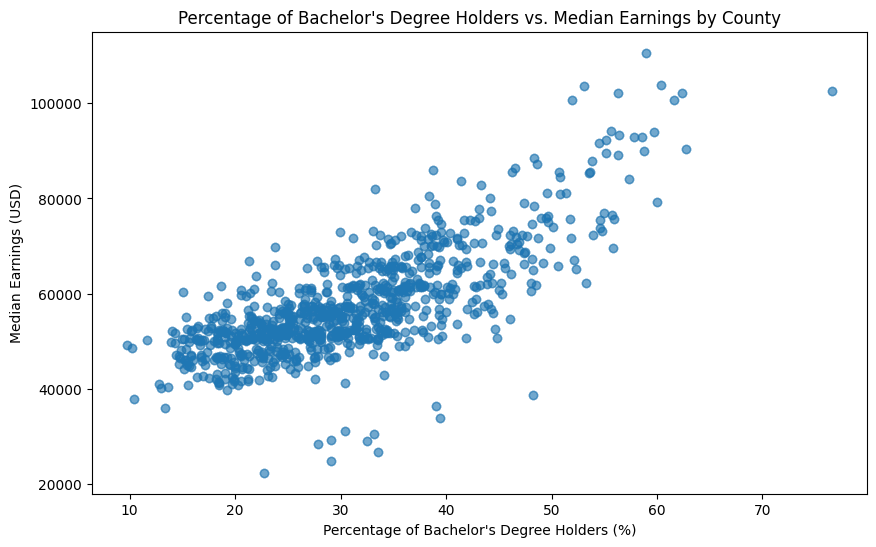

In [81]:
# Visual 1 - Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Percentage_BA'], df['Median earning'], alpha=0.1)
plt.title('Percentage of Bachelor\'s Degree Holders vs. Median Earnings by County')
plt.xlabel('Percentage of Bachelor\'s Degree Holders (%)')
plt.ylabel('Median Earnings (USD)')
plt.show()

**Answer to research question:** There seems to be a strong positive trend between the percentage of bachelor's degree hoders and the median earning. This trend suggests that, in general, counties with a higher percentage of people holding a bachelor's degree tend to have higher median earnings.

**2. Pie chart: The total percentage for each income bracket in the U.S.**

In [82]:
# Create a subset of df that groups dataframe by 'Earning range' and aggregate 'Population_16+'' and 'Count' columns
df_earning = df.groupby('Earning range').agg(total_count=('Count', 'sum'), total_population=('Population_16+', 'sum')).reset_index()
df_earning.head(9)

,Earning range,total_count,total_population
0,"10,000 - 14,999",1730260.0,103866868.0
1,"100,000 or more",25590155.0,103866868.0
2,"15,000 - 24,999",5830513.0,103866868.0
3,"25,000 - 34,999",10932997.0,103866868.0
4,"35,000 - 49,999",18945130.0,103866868.0
5,"50,000 - 64,999",16840709.0,103866868.0
6,"65,000 - 74,999",8268836.0,103866868.0
7,"75,000 - 99,999",14207289.0,103866868.0
8,"9,999 or less",1520979.0,103866868.0


In [83]:
# Calculate the percentage for each earning range
df_earning['Percentage'] = (df_earning['total_count'] / df_earning['total_population']) * 100
df_earning.head(9)

,Earning range,total_count,total_population,Percentage
0,"10,000 - 14,999",1730260.0,103866868.0,1.665844
1,"100,000 or more",25590155.0,103866868.0,24.637457
2,"15,000 - 24,999",5830513.0,103866868.0,5.613448
3,"25,000 - 34,999",10932997.0,103866868.0,10.525972
4,"35,000 - 49,999",18945130.0,103866868.0,18.239820
5,"50,000 - 64,999",16840709.0,103866868.0,16.213745
6,"65,000 - 74,999",8268836.0,103866868.0,7.960995
7,"75,000 - 99,999",14207289.0,103866868.0,13.678365
8,"9,999 or less",1520979.0,103866868.0,1.464354


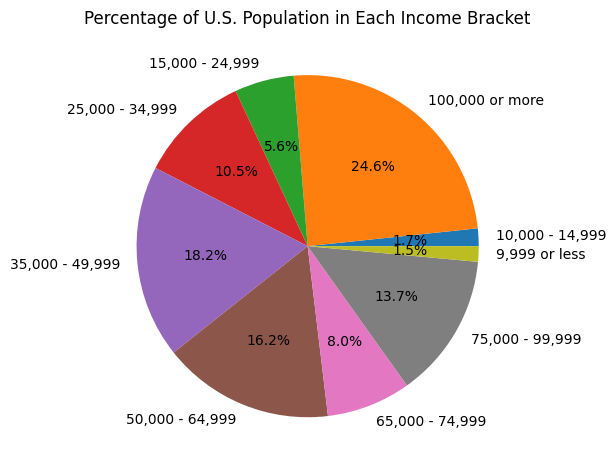

In [84]:
# Visual 2 - Pie chart
plt.pie(df_earning['Percentage'], labels=df_earning['Earning range'], autopct='%1.1f%%')
plt.title('Percentage of U.S. Population in Each Income Bracket')
plt.tight_layout()
plt.show()

**Answer to research question:** The largest percentage of the U.S. population falls into the $100,000 or more income bracket (24.64\%), which represents a significant portion of high earners.

### 6.2: Reflection

I would further inspect the missing values in the earning dataset or gather more data to impute the missing values.  
The research question that I would further explore is: How does the distribution of the population across income brackets vary by county?

## 7. References

**Links to U.S. Census Bureau resources:**

Available APIs: https://www.census.gov/data/developers/data-sets.html

2023 ACS Subject Tables Variables: https://api.census.gov/data/2023/acs/acs1/subject/variables.html

Census Data API User Guide: https://www2.census.gov/data/api-documentation/api-user-guide.pdf

Example API Queries: https://www.census.gov/data/developers/guidance/api-user-guide.Example_API_Queries.html#list-tab-559651575
